.<a href="https://www.spe.org/events/en/2022/conference/22apog/asia-pacific-oil-and-gas-conference-and-exhibition.html"><img src = "https://www.spe.org/binaries/content/gallery/specms/speevents/organization-logos/spe-logo-2020.png" width = 200> 

<h1 align=center><font size = 5>Prediction of Recovery Factor using Machine Learning Methods</font></h1>

<h1 align=center><font size = 4> Munish Kumar, Kannapan Swaminathan
<h1 align=center><font size = 3> ERCE 2022 </font></h1>

#### Libraries

In [1]:
# Only install the following libraries if you dont have it, otherwise leave it commented out

#!conda install -c anaconda natsort --yes
#!conda install -c anaconda xlrd --yes
#!conda install -c anaconda plotly --yes
#!conda install -c anaconda folium --yes
#!pip install folium

# General Libraries
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
import time
import re
import requests
import pickle
import seaborn as sns
import os
import glob
import sys
from natsort import natsorted
sns.set()

import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Sklearn Liraries
from sklearn import preprocessing

import datetime
from datetime import timedelta, date 
start = time.time()
%matplotlib inline

import folium
import shapefile as shp

# Forces the print statement to show everything and not truncate
# np.set_printoptions(threshold=sys.maxsize) 
print('Libraries imported')

Libraries imported


###### Declare some global variables

In [2]:
#Receive Data
#dir_name = r'C:\Users\mkumar\Documents\GitHub\munishkumar-gh.github.io\@Working\SPE_Paper'
dir_name = r'C:\Users\kswaminathan\OneDrive\01_KannaLibrary\15_Analogs'
filename_suffix = 'csv'

##### Read in the data and some preprocessing

In [3]:
skiprows = 0
#Means read in the ',' as thousand seperator. Also drops all columns which are unnamed.
df = pd.read_csv("CP4a_CARB_GAS_RF_data.csv", thousands=',', skiprows = skiprows)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')] 
df.head()

,1_Field name,2_Reservoir unit,5_Resource uncertainty,8_Country,10_Region,11_Basin name,15_Latitude,16_Longitude,18_Hydrocarbon type (main),32_Current status year,...,320_Secondary recovery methods,325_EOR methods,333_Improved recovery methods (other),334_Improved recovery methods (drilling),335_Improved recovery methods (stimulation),336_Improved recovery methods (water injection optimization),337_Improved recovery methods (artificial lift),338_Improved recovery methods (sand control),339_Improved recovery methods (other reservoir management),76_Pressure_Temp_depth (ft TVDSS)
0,ALBUSKJELL,TOR-EKOFISK,1P,NORWAY,EUROPE,NORTH SEA CENTRAL,56.6340,2.9973,GAS-CONDENSATE,1998.0,...,NaN,NaN,STIMULATION,NaN,ACIDIZATION,NaN,NaN,NaN,NaN,10500.0
1,ARUN,PEUTU (ARUN LIMESTONE),1P,INDONESIA,ASIA-PACIFIC,SUMATRA NORTH,5.0542,97.2583,GAS-CONDENSATE,2012.0,...,GAS RECYCLING,NaN,DRILLING/STIMULATION/OTHER RESERVOIR MANAGEMENT,INFILL WELL/HORIZONTAL WELL,ACIDIZATION/ACID FRACTURING,NaN,NaN,NaN,ACID WASH/COILED TUBING TREATMENT/SIDETRACKING,10050.0
2,ASTRAKHAN,PRIKAMA-SEVEROKEL TMA-KRASNAYA POLYANA,1P,KAZAKHSTAN-RUSSIAN FEDERATION,FORMER SOVIET UNION,CASPIAN NORTH,46.7883,48.0831,GAS-CONDENSATE,2000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12631.0
3,AWALI,KHUFF,1P,BAHRAIN,MIDDLE EAST,THE GULF,26.0333,50.5333,GAS,1994.0,...,NaN,NaN,STIMULATION,NaN,ACIDIZATION,NaN,NaN,NaN,NaN,10000.0
4,BEAVER RIVER,NAHANNI (MANETOE),1P,CANADA,NORTH AMERICA,WESTERN CANADA,59.9730,-124.2914,GAS,2012.0,...,NaN,NaN,DRILLING/OTHER RESERVOIR MANAGEMENT,HORIZONTAL WELL,NaN,NaN,NaN,NaN,RE-COMPLETION,10230.0


In [4]:
#Database Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 63 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   1_Field name                                                  81 non-null     object 
 1   2_Reservoir unit                                              81 non-null     object 
 2   5_Resource uncertainty                                        81 non-null     object 
 3   8_Country                                                     81 non-null     object 
 4   10_Region                                                     81 non-null     object 
 5   11_Basin name                                                 81 non-null     object 
 6   15_Latitude                                                   81 non-null     float64
 7   16_Longitude                                                  81 non-null

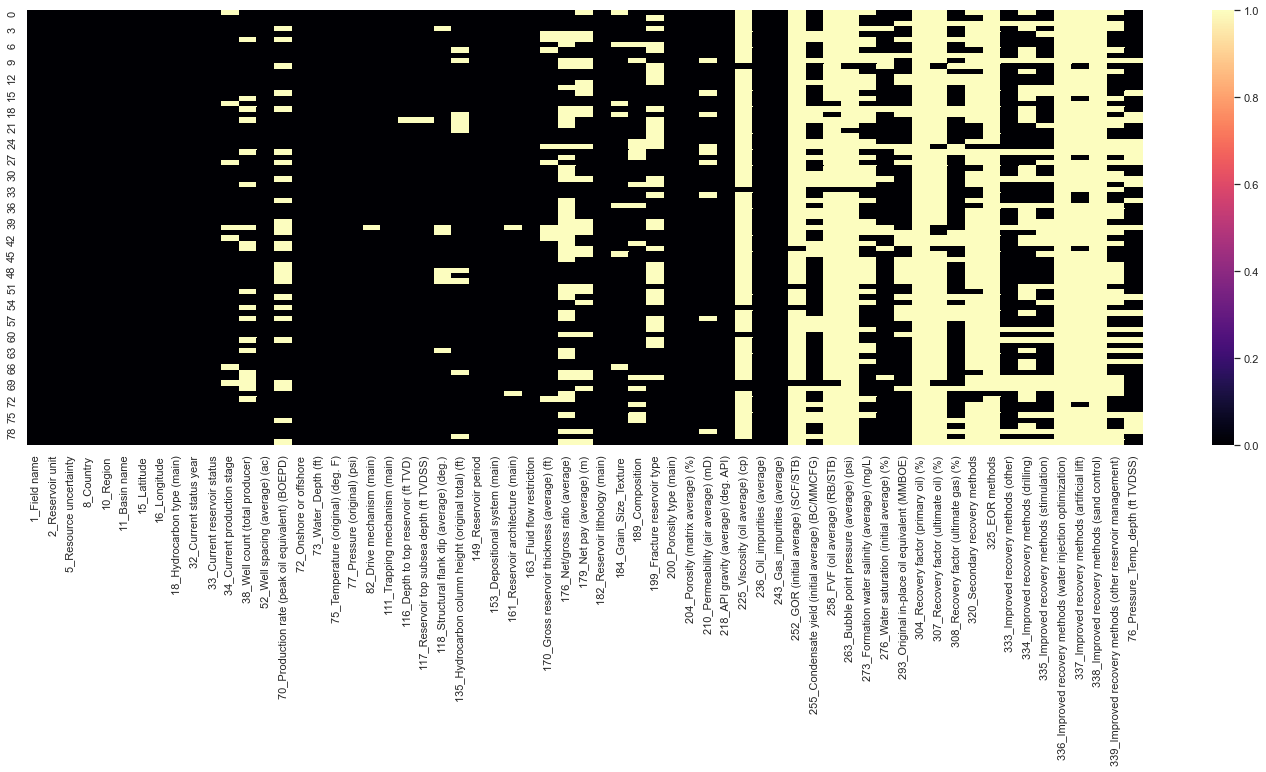

In [5]:
#Missing Values
fig, ax = plt.subplots(figsize=(25,8))
sns.heatmap(df.isnull(), ax=ax, cmap="magma")
plt.grid()
plt.show()

In [6]:
#Creating a base map
m = folium.Map()

for lat, lon, name in zip(df['15_Latitude'],df['16_Longitude'],df['1_Field name']):
    #Creating the marker
    folium.Marker(
    #Coordinate of the country
    location=[lat, lon],
    #The popup that show up if click the marker
    popup=name
    ).add_to(m)
m

In [7]:
print(df.shape)

(81, 63)


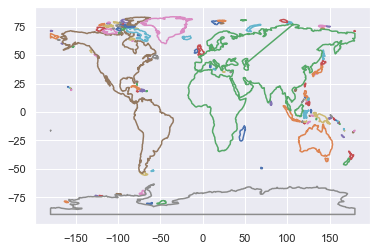

In [8]:
#%matplotlib inline
#import shapefile as shp  # Requires the pyshp package
#import matplotlib.pyplot as plt

sf = shp.Reader("ne_110m_land.shp")

plt.figure()
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y)
plt.show()

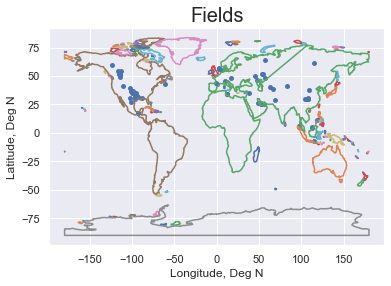

In [9]:
x = df['16_Longitude']
y = df['15_Latitude']

fig, ax = plt.subplots()
s = ax.scatter(x, y,
               color = 'b',
               s=15,
               marker='o')                   # Plot circles
               #alpha = 0.2 )
               
plt.title('Fields', fontsize = 20)
plt.ylabel('Latitude, Deg N')
plt.xlabel('Longitude, Deg N')

for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y)
plt.show()

##### Clean and filter database for only Oil Reservoirs with Sandstone Lithology 

In [10]:
#Clean and filter database for only Oil Reservoirs with Sandstone Lithology 
dflsgas = df.copy()

In [11]:
pd.set_option('display.max_rows', None)

In [12]:
#Null Values in Database
dflsgas.isnull().sum().sort_values(ascending=False)

338_Improved recovery methods (sand control)                    81
336_Improved recovery methods (water injection optimization)    81
304_Recovery factor (primary oil) (%)                           81
325_EOR methods                                                 79
263_Bubble point pressure (average) (psi)                       78
252_GOR (initial average) (SCF/STB)                             77
258_FVF (oil average) (RB/STB)                                  77
307_Recovery factor (ultimate oil) (%)                          75
337_Improved recovery methods (artificial lift)                 74
225_Viscosity (oil average) (cp)                                74
320_Secondary recovery methods                                  66
339_Improved recovery methods (other reservoir management)      43
176_Net/gross ratio (average)                                   42
334_Improved recovery methods (drilling)                        42
273_Formation water salinity (average) (mg/L)                 

In [13]:
dflsgas.shape

(81, 63)

##### Drop Unnecessary Columns not related to gas reservoirs with carbonate lithology

In [14]:
# Drop Unnecessary Columns not related to gas reservoirs with carb lithology
dflsgas.drop(['336_Improved recovery methods (water injection optimization)', '199_Fracture reservoir type', 
              '304_Recovery factor (primary oil) (%)', '273_Formation water salinity (average) (mg/L)', 
             '189_Composition', '184_Grain_Size_Texture', '163_Fluid flow restriction', '236_Oil_impurities (average)',
             '2_Reservoir unit', '111_Trapping mechanism (main)', '243_Gas_impurities (average)', '263_Bubble point pressure (average) (psi)', 
             '258_FVF (oil average) (RB/STB)', '307_Recovery factor (ultimate oil) (%)', '252_GOR (initial average) (SCF/STB)', 
             '225_Viscosity (oil average) (cp)', '70_Production rate (peak oil equivalent) (BOEPD)', '34_Current production stage',
             '32_Current status year', '33_Current reservoir status', '5_Resource uncertainty', '8_Country', '15_Latitude', '16_Longitude', 
             '218_API gravity (average) (deg. API)', '73_Water_Depth (ft)'], axis=1, inplace=True)

In [15]:
dflsgas.shape

(81, 37)

##### Combine EOR and IOR methods that enhance RFs

In [16]:
#print(dfssgas['320_Secondary recovery methods'].value_counts())
#print(dfssgas['325_EOR methods'].value_counts())
#print(dfssgas['333_Improved recovery methods (other)'].value_counts())
#print(dfssgas['334_Improved recovery methods (drilling)'].value_counts())
#print(dfssgas['335_Improved recovery methods (stimulation)'].value_counts())
#print(dfssgas['336_Improved recovery methods (water injection optimization)'].value_counts())
#print(dfssgas['337_Improved recovery methods (artificial lift)'].value_counts())
#print(dfssgas['338_Improved recovery methods (sand control)'].value_counts())
#print(dfssgas['339_Improved recovery methods (other reservoir management)'].value_counts())

In [17]:
# Collapse IOR EOR 
dfEORIOR = pd.DataFrame(dflsgas, columns=['320_Secondary recovery methods', '325_EOR methods', '333_Improved recovery methods (other)',
                                         '334_Improved recovery methods (drilling)','335_Improved recovery methods (stimulation)', 
                                          '337_Improved recovery methods (artificial lift)', '338_Improved recovery methods (sand control)'
                                         '339_Improved recovery methods (other reservoir management)'])

In [18]:
dfEORIOR.head()

,320_Secondary recovery methods,325_EOR methods,333_Improved recovery methods (other),334_Improved recovery methods (drilling),335_Improved recovery methods (stimulation),337_Improved recovery methods (artificial lift),338_Improved recovery methods (sand control)339_Improved recovery methods (other reservoir management)
0,NaN,NaN,STIMULATION,NaN,ACIDIZATION,NaN,NaN
1,GAS RECYCLING,NaN,DRILLING/STIMULATION/OTHER RESERVOIR MANAGEMENT,INFILL WELL/HORIZONTAL WELL,ACIDIZATION/ACID FRACTURING,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,STIMULATION,NaN,ACIDIZATION,NaN,NaN
4,NaN,NaN,DRILLING/OTHER RESERVOIR MANAGEMENT,HORIZONTAL WELL,NaN,NaN,NaN


In [19]:
dfrf = pd.DataFrame(dflsgas, columns=['308_Recovery factor (ultimate gas) (%)'])

In [20]:
print(dfrf.isnull().sum().sort_values(ascending=False))
dfrf.describe()

308_Recovery factor (ultimate gas) (%)    22
dtype: int64


,308_Recovery factor (ultimate gas) (%)
count,59.000000
mean,72.967797
std,17.913561
min,17.000000
25%,68.250000
50%,77.000000
75%,86.000000
max,95.000000


In [21]:
#dfssgas['336a_Improved recovery methods (water injection optimization)'] = np.where(dfssgas['336_Improved recovery methods (water injection optimization)'].isnull(), 0, 1)
dflsgas['338a_Improved recovery methods (sand control)'] = np.where(dflsgas['338_Improved recovery methods (sand control)'].isnull(), 0, 1)
dflsgas['325a_EOR methods'] = np.where(dflsgas['325_EOR methods'].isnull(), 0, 1)
dflsgas['335a_Improved recovery methods (stimulation)'] = np.where(dflsgas['335_Improved recovery methods (stimulation)'].isnull(), 0, 1)
dflsgas['339a_Improved recovery methods (other reservoir management)'] = np.where(dflsgas['339_Improved recovery methods (other reservoir management)'].isnull(), 0, 1)
dflsgas['337a_Improved recovery methods (artificial lift)'] = np.where(dflsgas['337_Improved recovery methods (artificial lift)'].isnull(), 0, 1)
dflsgas['334a_Improved recovery methods (drilling)'] = np.where(dflsgas['334_Improved recovery methods (drilling)'].isnull(), 0, 1)
dflsgas['320a_Secondary recovery methods'] = np.where(dflsgas['320_Secondary recovery methods'].isnull(), 0, 1)
dflsgas['333a_Improved recovery methods (other)'] = np.where(dflsgas['333_Improved recovery methods (other)'].isnull(), 0, 1)

In [22]:
#Drop duplicates
dflsgas.drop(['338_Improved recovery methods (sand control)', '325_EOR methods', 
             '335_Improved recovery methods (stimulation)', '339_Improved recovery methods (other reservoir management)', '337_Improved recovery methods (artificial lift)', 
              '334_Improved recovery methods (drilling)', '320_Secondary recovery methods','333_Improved recovery methods (other)'], axis=1, inplace=True)

In [23]:
dflsgas['EORIOR'] = (dflsgas['338a_Improved recovery methods (sand control)'] + dflsgas['325a_EOR methods'] 
                     + dflsgas['335a_Improved recovery methods (stimulation)'] + dflsgas['339a_Improved recovery methods (other reservoir management)']
                     + dflsgas['337a_Improved recovery methods (artificial lift)']
                     + dflsgas['334a_Improved recovery methods (drilling)']
                     + dflsgas['320a_Secondary recovery methods'] + dflsgas['333a_Improved recovery methods (other)'])

In [24]:
dflsgas.drop(['338a_Improved recovery methods (sand control)', '325a_EOR methods', 
             '335a_Improved recovery methods (stimulation)', '339a_Improved recovery methods (other reservoir management)', '337a_Improved recovery methods (artificial lift)', 
              '334a_Improved recovery methods (drilling)', '320a_Secondary recovery methods', '333a_Improved recovery methods (other)'], axis=1, inplace=True)

In [25]:
dflsgas.shape

(81, 30)

In [26]:
dflsgas.isnull().sum().sort_values(ascending=False)

176_Net/gross ratio (average)                          42
255_Condensate yield (initial average) (BC/MMCFG)      28
179_Net pay (average) (m)                              26
293_Original in-place oil equivalent (MMBOE)           24
76_Pressure_Temp_depth (ft TVDSS)                      23
308_Recovery factor (ultimate gas) (%)                 22
38_Well count (total producer)                         19
276_Water saturation (initial average) (%)             11
135_Hydrocarbon column height (original total) (ft)    10
210_Permeability (air average) (mD)                     9
170_Gross reservoir thickness (average) (ft)            9
118_Structural flank dip (average) (deg.)               7
161_Reservoir architecture (main)                       2
82_Drive mechanism (main)                               1
116_Depth to top reservoir (ft TVD)                     1
117_Reservoir top subsea depth (ft TVDSS)               1
EORIOR                                                  0
72_Onshore or 

##### Delete rows with no RF and Depth data

In [27]:
# delete rows with no RF data
dflsgas = dflsgas.dropna(axis=0, subset=['308_Recovery factor (ultimate gas) (%)'])

In [28]:
# delete rows with no depth data
dflsgas = dflsgas.dropna(axis=0, subset=['117_Reservoir top subsea depth (ft TVDSS)'])

In [29]:
dflsgas.shape

(58, 30)

##### Delete uncessary columns 

In [30]:
#Delete uncessary columns 
dflsgas.drop(['1_Field name', 
              #'73_Water_Depth (ft)', 
             #'33_Current reservoir status', 
              '18_Hydrocarbon type (main)', 
              #'16_Longitude', 
              #'5_Resource uncertainty', '8_Country', '15_Latitude'
             ], axis=1, inplace=True)

dflsgas.drop([
    #'70_Production rate (peak oil equivalent) (BOEPD)', 
    #          '34_Current production stage', 
             '200_Porosity type (main)'], axis=1, inplace=True)

dflsgas.drop(['76_Pressure_Temp_depth (ft TVDSS)'], axis=1, inplace=True)

#dfssgas.drop(['11_Basin name', 
#              '32_Current status year', '304_Recovery factor (primary oil) (%)'], axis=1, inplace=True)

dflsgas.drop(['38_Well count (total producer)', 
#              '258_FVF (oil average) (RB/STB)'
             ], axis=1, inplace=True)

dflsgas.drop(['276_Water saturation (initial average) (%)', 
              #'263_Bubble point pressure (average) (psi)',
              '179_Net pay (average) (m)' ], axis=1, inplace=True)

dflsgas.drop(['135_Hydrocarbon column height (original total) (ft)', '182_Reservoir lithology (main)'], axis=1, inplace=True)

dflsgas.drop(['170_Gross reservoir thickness (average) (ft)'], axis=1, inplace=True)

dflsgas.drop(['116_Depth to top reservoir (ft TVD)'], axis=1, inplace=True)

#161_Reservoir architecture (main)                

In [31]:
dflsgas.shape

(58, 19)

In [32]:
dflsgas.isnull().sum().sort_values(ascending=False)

176_Net/gross ratio (average)                        27
255_Condensate yield (initial average) (BC/MMCFG)    18
293_Original in-place oil equivalent (MMBOE)          6
118_Structural flank dip (average) (deg.)             6
210_Permeability (air average) (mD)                   4
161_Reservoir architecture (main)                     2
82_Drive mechanism (main)                             1
EORIOR                                                0
77_Pressure (original) (psi)                          0
11_Basin name                                         0
52_Well spacing (average) (ac)                        0
72_Onshore or offshore                                0
75_Temperature (original) (deg. F)                    0
149_Reservoir period                                  0
117_Reservoir top subsea depth (ft TVDSS)             0
308_Recovery factor (ultimate gas) (%)                0
153_Depositional system (main)                        0
204_Porosity (matrix average) (%)               

In [33]:
# drop rows with no values for Drive Mechanism and Porosity 
#dfssgas = dfssgas.dropna(axis=0, subset=['82_Drive mechanism (main)'])
#dfssgas = dfssgas.dropna(axis=0, subset=['204_Porosity (matrix average) (%)'])

In [34]:
print(dflsgas['153_Depositional system (main)'].value_counts())

11:LOW-ENERGY CARBONATE MUD      22
13:ORGANIC BUILDUP               16
12:HIGH-ENERGY CARBONATE SAND    14
14:FORESLOPE-BASIN                6
Name: 153_Depositional system (main), dtype: int64


##### Generate values for missing permeability values as a function of porosity

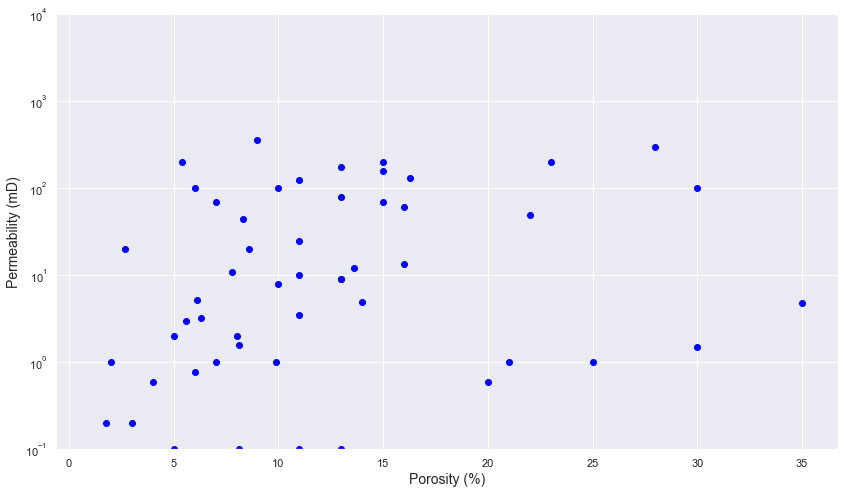

In [35]:
# Generate values for missing permeability values as a function of porosity
a = dflsgas['204_Porosity (matrix average) (%)']
b = dflsgas['210_Permeability (air average) (mD)']

plt.figure(figsize=(14, 8))
plt.scatter(a, b, color='blue')
plt.xlabel("Porosity (%)", size=14)
plt.ylabel("Permeability (mD)", size=14)
plt.yscale('log', nonposy='clip')
plt.ylim([0.1, 10000])
#plt.gca().invert_yaxis()

#plt.tight_layout()
plt.show()

In [36]:
# Drop perm values that are 0 
dflsgas = dflsgas.drop(dflsgas[dflsgas['210_Permeability (air average) (mD)'] == 0].index)

In [37]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
#fit = np.polyfit(np.log(x), y, 1)

cdf = dflsgas[['210_Permeability (air average) (mD)', '204_Porosity (matrix average) (%)']]
testdf = cdf[cdf['210_Permeability (air average) (mD)'].isnull()==True].fillna(0)
traindf = cdf[cdf['210_Permeability (air average) (mD)'].isnull()==False].fillna(0)

y = traindf['210_Permeability (air average) (mD)']
traindf.drop('210_Permeability (air average) (mD)', axis=1, inplace=True)
ln_y = np.log(y)

lr.fit(traindf,ln_y)
testdf.drop('210_Permeability (air average) (mD)', axis=1, inplace=True)
#pred = lr.predict(testdf)
pred = np.exp(lr.predict(testdf))
testdf['210_Permeability (air average) (mD)'] = pred


#Coefficients
print("Gradient: ", lr.coef_)
print("Intercept: ", lr.intercept_)

testdf = testdf.rename(columns={'204_Porosity (matrix average) (%)': '204_RPT_Porosity (matrix average) (%)', 
                                '210_Permeability (air average) (mD)': '210_RPT_Permeability (air average) (mD)'
                               })

Gradient:  [0.09971912]
Intercept:  0.7025874878953038


In [38]:
dflsgas = pd.concat([dflsgas, testdf], axis=1)

dflsgas['210_Permeability (air average) (mD)'] = dflsgas['210_RPT_Permeability (air average) (mD)'].fillna(0) + dflsgas['210_Permeability (air average) (mD)'].fillna(0)

dflsgas = dflsgas.drop([
    '210_RPT_Permeability (air average) (mD)', '204_RPT_Porosity (matrix average) (%)', 
], axis = 1) 

In [39]:
dflsgas.isnull().sum().sort_values(ascending=False)

176_Net/gross ratio (average)                        27
255_Condensate yield (initial average) (BC/MMCFG)    18
293_Original in-place oil equivalent (MMBOE)          6
118_Structural flank dip (average) (deg.)             6
161_Reservoir architecture (main)                     2
82_Drive mechanism (main)                             1
EORIOR                                                0
11_Basin name                                         0
52_Well spacing (average) (ac)                        0
72_Onshore or offshore                                0
75_Temperature (original) (deg. F)                    0
77_Pressure (original) (psi)                          0
149_Reservoir period                                  0
117_Reservoir top subsea depth (ft TVDSS)             0
308_Recovery factor (ultimate gas) (%)                0
153_Depositional system (main)                        0
204_Porosity (matrix average) (%)                     0
210_Permeability (air average) (mD)             

In [40]:
dflsgas.shape

(58, 19)

##### Fill Up mode for Reservoir Architecture and Drive Mechanism

In [41]:
#dflsgas['149_Reservoir period'] = dflsgas['149_Reservoir period'].apply(lambda x: x.fillna(x.mode().iat[0]))

#mode_resarc=df2['161_Reservoir architecture (main)'].mode()
#df2['161_Reservoir architecture (main)'].fillna(value=mode_resarc, inplace=True)

dflsgas['161_Reservoir architecture (main)'] = dflsgas['161_Reservoir architecture (main)'].fillna(dflsgas['161_Reservoir architecture (main)'].mode()[0])

In [42]:
dflsgas['82_Drive mechanism (main)'] = dflsgas['82_Drive mechanism (main)'].fillna(dflsgas['82_Drive mechanism (main)'].mode()[0])

In [43]:
dflsgas.isnull().sum().sort_values(ascending=False)

176_Net/gross ratio (average)                        27
255_Condensate yield (initial average) (BC/MMCFG)    18
293_Original in-place oil equivalent (MMBOE)          6
118_Structural flank dip (average) (deg.)             6
EORIOR                                                0
82_Drive mechanism (main)                             0
11_Basin name                                         0
52_Well spacing (average) (ac)                        0
72_Onshore or offshore                                0
75_Temperature (original) (deg. F)                    0
77_Pressure (original) (psi)                          0
149_Reservoir period                                  0
117_Reservoir top subsea depth (ft TVDSS)             0
308_Recovery factor (ultimate gas) (%)                0
153_Depositional system (main)                        0
161_Reservoir architecture (main)                     0
204_Porosity (matrix average) (%)                     0
210_Permeability (air average) (mD)             

##### Generate values for missing GIIP values as a function of porosity

count        52.000000
mean       5823.117308
std       33080.215979
min          29.000000
25%         204.660000
50%         344.000000
75%         982.500000
max      239000.000000
Name: 293_Original in-place oil equivalent (MMBOE), dtype: float64

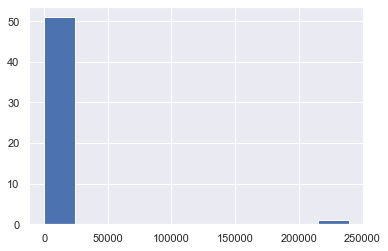

In [44]:
dflsgas['293_Original in-place oil equivalent (MMBOE)'].hist()
dflsgas['293_Original in-place oil equivalent (MMBOE)'].describe()

In [45]:
dflsgas['293_Original in-place oil equivalent (MMBOE)'] = ((dflsgas['293_Original in-place oil equivalent (MMBOE)']*1000000)*6000)/1000000000

In [46]:
dflsgas = dflsgas.rename(columns={'293_Original in-place oil equivalent (MMBOE)': '293_Original in-place gas (Bscf))'})

count    5.200000e+01
mean     3.493870e+04
std      1.984813e+05
min      1.740000e+02
25%      1.227960e+03
50%      2.064000e+03
75%      5.895000e+03
max      1.434000e+06
Name: 293_Original in-place gas (Bscf)), dtype: float64

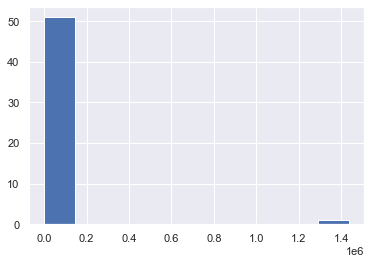

In [47]:
dflsgas['293_Original in-place gas (Bscf))'].hist()
dflsgas['293_Original in-place gas (Bscf))'].describe()

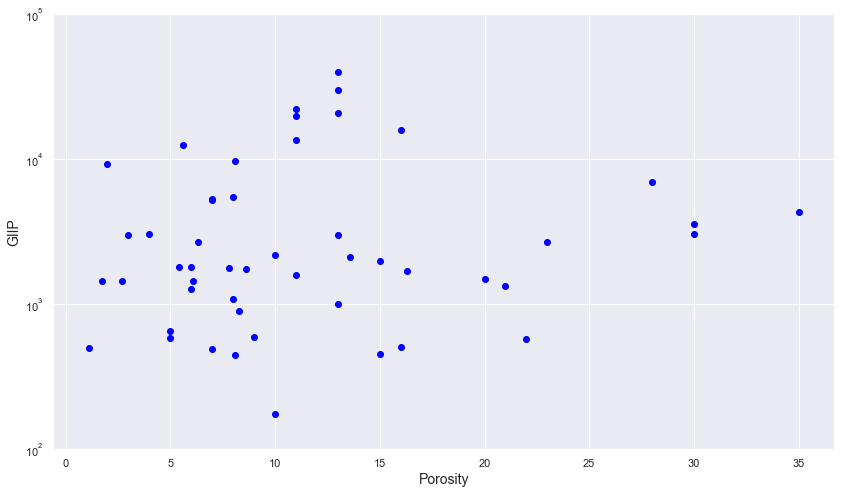

In [48]:
a = dflsgas['204_Porosity (matrix average) (%)']
b = dflsgas['293_Original in-place gas (Bscf))']

plt.figure(figsize=(14, 8))
plt.scatter(a, b, color='blue')
plt.xlabel("Porosity", size=14)
plt.ylabel("GIIP", size=14)
plt.yscale('log', nonposy='clip')
plt.ylim([100, 100000])
#plt.ylim([0.1, 10000])
#plt.xscale('log')
#plt.gca().invert_yaxis()

#plt.tight_layout()
plt.show()

In [49]:
lr = LinearRegression()
#fit = np.polyfit(np.log(x), y, 1)

# Start with Pressure
cdf2 = dflsgas[['293_Original in-place gas (Bscf))', '204_Porosity (matrix average) (%)']]
testdf2 = cdf2[cdf2['293_Original in-place gas (Bscf))'].isnull()==True].fillna(0)
traindf2 = cdf2[cdf2['293_Original in-place gas (Bscf))'].isnull()==False].fillna(0)

y2 = traindf2['293_Original in-place gas (Bscf))']
traindf2.drop('293_Original in-place gas (Bscf))', axis=1, inplace=True)
ln_y2 = np.log(y2)

lr.fit(traindf2,ln_y2)
testdf2.drop('293_Original in-place gas (Bscf))', axis=1, inplace=True)
#pred = lr.predict(testdf)
pred2 = np.exp(lr.predict(testdf2))
testdf2['293_Original in-place gas (Bscf))'] = pred2


#Coefficients
print("Gradient: ", lr.coef_)
print("Intercept: ", lr.intercept_)

testdf2 = testdf2.rename(columns={'204_Porosity (matrix average) (%)': '204_RPT_Porosity (matrix average) (%)', 
                                '293_Original in-place gas (Bscf))': '293_RPT_Original in-place gas (Bscf))'
                               })

Gradient:  [0.02570762]
Intercept:  7.703756465450544


In [50]:
dflsgas = pd.concat([dflsgas, testdf2], axis=1)

dflsgas['293_Original in-place gas (Bscf))'] = dflsgas['293_RPT_Original in-place gas (Bscf))'].fillna(0) + dflsgas['293_Original in-place gas (Bscf))'].fillna(0)

dflsgas = dflsgas.drop([
    '293_RPT_Original in-place gas (Bscf))', '204_RPT_Porosity (matrix average) (%)', 
], axis = 1) 

##### Fill missing values for Structural Flank Dip with average

In [51]:
#fill missing values for Structural Flank Dip with average
#dfssgas['118_Structural flank dip (average) (deg.)'] = dfssgas.apply(lambda x: x.fillna(x.mode().iat[0]))

mean_flankdip=dflsgas['118_Structural flank dip (average) (deg.)'].mean()
dflsgas['118_Structural flank dip (average) (deg.)'].fillna(value=mean_flankdip, inplace=True)

In [52]:
dflsgas.shape

(58, 19)

##### Fill missing values for CGR based on relationship with Pressure

In [53]:
dflsgas.isnull().sum().sort_values(ascending=False)

176_Net/gross ratio (average)                        27
255_Condensate yield (initial average) (BC/MMCFG)    18
EORIOR                                                0
117_Reservoir top subsea depth (ft TVDSS)             0
11_Basin name                                         0
52_Well spacing (average) (ac)                        0
72_Onshore or offshore                                0
75_Temperature (original) (deg. F)                    0
77_Pressure (original) (psi)                          0
82_Drive mechanism (main)                             0
149_Reservoir period                                  0
118_Structural flank dip (average) (deg.)             0
308_Recovery factor (ultimate gas) (%)                0
153_Depositional system (main)                        0
161_Reservoir architecture (main)                     0
204_Porosity (matrix average) (%)                     0
210_Permeability (air average) (mD)                   0
293_Original in-place gas (Bscf))               

<Figure size 1440x1080 with 0 Axes>

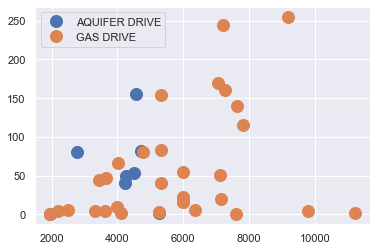

In [54]:
# Check if Drive mechanism impacts CGR
groups = dflsgas.groupby('82_Drive mechanism (main)')
plt.figure(figsize=(20, 15))
fig, ax = plt.subplots()
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group['77_Pressure (original) (psi)'], group['255_Condensate yield (initial average) (BC/MMCFG)'], marker='o', linestyle='', ms=12, label=name)
ax.legend()


plt.show()

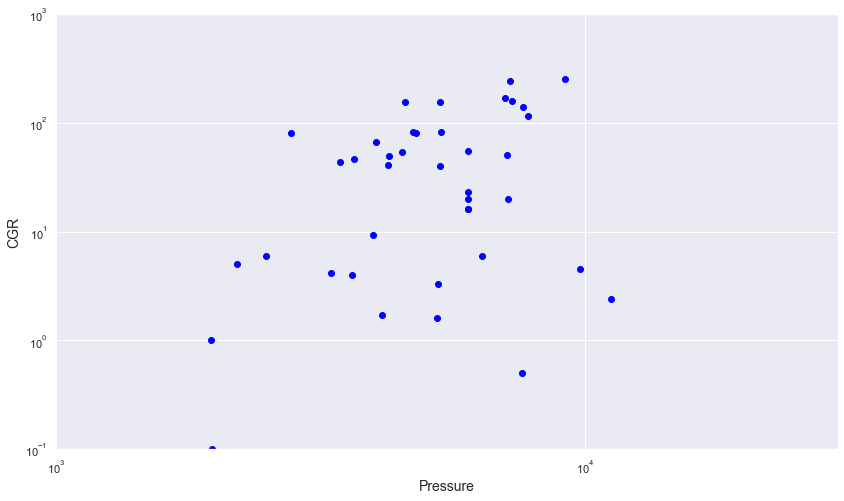

In [55]:
# Generate values for missing GOR values as a function of Pressure
a = dflsgas['77_Pressure (original) (psi)']
b = dflsgas['255_Condensate yield (initial average) (BC/MMCFG)']

plt.figure(figsize=(14, 8))
plt.scatter(a, b, color='blue')
plt.xlabel("Pressure", size=14)
plt.ylabel("CGR", size=14)
plt.yscale('log')
plt.xscale('log')
#plt.gca().invert_yaxis()
plt.ylim([0.1, 1000])
plt.xlim([1000, 30000])

#plt.tight_layout()
plt.show()

In [56]:
lr = LinearRegression()
#fit = np.polyfit(np.log(x), y, 1)

# Start with Pressure
cdf3 = dflsgas[['255_Condensate yield (initial average) (BC/MMCFG)', '77_Pressure (original) (psi)']]
testdf3 = cdf3[cdf3['255_Condensate yield (initial average) (BC/MMCFG)'].isnull()==True].fillna(0)
traindf3 = cdf3[cdf3['255_Condensate yield (initial average) (BC/MMCFG)'].isnull()==False].fillna(0)

y3 = traindf3['255_Condensate yield (initial average) (BC/MMCFG)']
traindf3.drop('255_Condensate yield (initial average) (BC/MMCFG)', axis=1, inplace=True)
ln_y3 = np.log(y3)
ln_traindf3 = np.log(traindf3)

lr.fit(ln_traindf3,ln_y3)
testdf3.drop('255_Condensate yield (initial average) (BC/MMCFG)', axis=1, inplace=True)
ln_testdf3 = np.log(testdf3)
#pred = lr.predict(ln_testdf3)
pred3 = np.exp(lr.predict(ln_testdf3))
testdf3['255_Condensate yield (initial average) (BC/MMCFG)'] = pred3


#Coefficients
print("Gradient: ", lr.coef_)
print("Intercept: ", lr.intercept_)

testdf3 = testdf3.rename(columns={'77_Pressure (original) (psi)': '77_RPT_Pressure (original) (psi)', 
                                '255_Condensate yield (initial average) (BC/MMCFG)': '255_RPT_Condensate yield (initial average) (BC/MMCFG)'
                               })

Gradient:  [1.55893536]
Intercept:  -10.270917920050735


In [57]:
dflsgas = pd.concat([dflsgas, testdf3], axis=1)

dflsgas['255_Condensate yield (initial average) (BC/MMCFG)'] = dflsgas['255_RPT_Condensate yield (initial average) (BC/MMCFG)'].fillna(0) + dflsgas['255_Condensate yield (initial average) (BC/MMCFG)'].fillna(0)

dflsgas = dflsgas.drop([
    '255_RPT_Condensate yield (initial average) (BC/MMCFG)', '77_RPT_Pressure (original) (psi)', 
], axis = 1) 

In [58]:
dflsgas.isnull().sum().sort_values(ascending=False)

176_Net/gross ratio (average)                        27
EORIOR                                                0
118_Structural flank dip (average) (deg.)             0
11_Basin name                                         0
52_Well spacing (average) (ac)                        0
72_Onshore or offshore                                0
75_Temperature (original) (deg. F)                    0
77_Pressure (original) (psi)                          0
82_Drive mechanism (main)                             0
117_Reservoir top subsea depth (ft TVDSS)             0
149_Reservoir period                                  0
308_Recovery factor (ultimate gas) (%)                0
153_Depositional system (main)                        0
161_Reservoir architecture (main)                     0
204_Porosity (matrix average) (%)                     0
210_Permeability (air average) (mD)                   0
255_Condensate yield (initial average) (BC/MMCFG)     0
293_Original in-place gas (Bscf))               

##### Generate values for missing NTG values as a function of porosity

<Figure size 1440x1080 with 0 Axes>

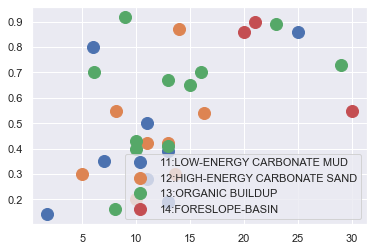

In [59]:
# Check if lithology impacts NTG
groups = dflsgas.groupby('153_Depositional system (main)')
plt.figure(figsize=(20, 15))
fig, ax = plt.subplots()
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group['204_Porosity (matrix average) (%)'], group['176_Net/gross ratio (average)'], marker='o', linestyle='', ms=12, label=name)
ax.legend()
#ax.set_yscale("log")

plt.show()

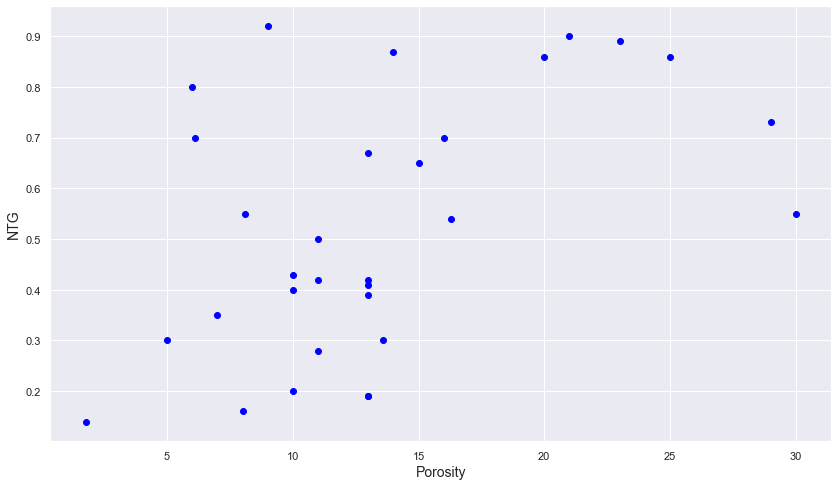

In [60]:
# Generate values for missing NTG values as a function of Porosity
a = dflsgas['204_Porosity (matrix average) (%)']
b = dflsgas['176_Net/gross ratio (average)']

plt.figure(figsize=(14, 8))
plt.scatter(a, b, color='blue')
plt.xlabel("Porosity", size=14)
plt.ylabel("NTG", size=14)
#plt.yscale('log')
#plt.xscale('log')
#plt.gca().invert_yaxis()

#plt.tight_layout()
plt.show()

In [61]:
lr = LinearRegression()
#fit = np.polyfit(np.log(x), y, 1)

cdf4 = dflsgas[['176_Net/gross ratio (average)', '204_Porosity (matrix average) (%)']]
testdf4 = cdf4[cdf4['176_Net/gross ratio (average)'].isnull()==True].fillna(0)
traindf4 = cdf4[cdf4['176_Net/gross ratio (average)'].isnull()==False].fillna(0)

y4 = traindf4['176_Net/gross ratio (average)']
traindf4.drop('176_Net/gross ratio (average)', axis=1, inplace=True)
#ln_y4 = np.log(y4)

lr.fit(traindf4,y4)
testdf4.drop('176_Net/gross ratio (average)', axis=1, inplace=True)
pred = lr.predict(testdf4)
#pred2 = np.exp(lr.predict(testdf2))
testdf4['176_Net/gross ratio (average)'] = pred


#Coefficients
print("Gradient: ", lr.coef_)
print("Intercept: ", lr.intercept_)

testdf4 = testdf4.rename(columns={'204_Porosity (matrix average) (%)': '204_RPT_Porosity (matrix average) (%)', 
                                '176_Net/gross ratio (average)': '176_RPT_Net/gross ratio (average)'
                               })

Gradient:  [0.01801093]
Intercept:  0.2838060110073247


In [62]:
dflsgas = pd.concat([dflsgas, testdf4], axis=1)#

dflsgas['176_Net/gross ratio (average)'] = dflsgas['176_Net/gross ratio (average)'].fillna(0) + dflsgas['176_RPT_Net/gross ratio (average)'].fillna(0)

dflsgas = dflsgas.drop([
    '176_RPT_Net/gross ratio (average)', '204_RPT_Porosity (matrix average) (%)', 
], axis = 1) 

In [63]:
#dfssgas = dfssgas.dropna(axis=0, subset=['176_Net/gross ratio (average)'])

In [64]:
dflsgas.isnull().sum().sort_values(ascending=False)

EORIOR                                               0
118_Structural flank dip (average) (deg.)            0
11_Basin name                                        0
52_Well spacing (average) (ac)                       0
72_Onshore or offshore                               0
75_Temperature (original) (deg. F)                   0
77_Pressure (original) (psi)                         0
82_Drive mechanism (main)                            0
117_Reservoir top subsea depth (ft TVDSS)            0
149_Reservoir period                                 0
308_Recovery factor (ultimate gas) (%)               0
153_Depositional system (main)                       0
161_Reservoir architecture (main)                    0
176_Net/gross ratio (average)                        0
204_Porosity (matrix average) (%)                    0
210_Permeability (air average) (mD)                  0
255_Condensate yield (initial average) (BC/MMCFG)    0
293_Original in-place gas (Bscf))                    0
10_Region 

In [65]:
dflsgas.shape

(58, 19)

In [66]:
dflsgas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 79
Data columns (total 19 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   10_Region                                          58 non-null     object 
 1   11_Basin name                                      58 non-null     object 
 2   52_Well spacing (average) (ac)                     58 non-null     float64
 3   72_Onshore or offshore                             58 non-null     object 
 4   75_Temperature (original) (deg. F)                 58 non-null     float64
 5   77_Pressure (original) (psi)                       58 non-null     float64
 6   82_Drive mechanism (main)                          58 non-null     object 
 7   117_Reservoir top subsea depth (ft TVDSS)          58 non-null     float64
 8   118_Structural flank dip (average) (deg.)          58 non-null     float64
 9   149_Reservoi